# Linear regression one variable

Covariance defines whether how two variables change together:

- higher values from a dataset associated with higher values from other dataset (positive covariance)
- higher values from a dataset associated with lower values from other dataset (negative covariance)
- no correlation

independence of two variable is given by $cov(x,y) = 0$

Correlation is given by:

$r_{xy} = \frac{cov(x, y)}{\sigma_{x} \sigma_{y}}$

Regression and correlation measures two samples and verify how they relate to each other.

Linear regression is given by:

$y = a + bx$

- a is the point where the line reaches axis $y$ when $x=0$ 
- b is slope

Example from [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
<div style='float: center'>
  <img style='width: 600px' src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png"/>
</div>

$Y_{i} = \alpha + \beta \cdot X_{i} + \epsilon_{i}$

Onde:

- $Y_{i}$ dependent variable
- $\alpha$ linear coefficient
- $\beta$ angular coefficient
- $X_{i}$ independent variable
- $\epsilon_{i}$ random error




Example problem:

| Sales quantity | Revenue |
|----------------|---------|
| 10 | 100 |
| 20 | 100 |
| 30 | 200 |
| 40 | 200 |
| 50 | 400 |

In [73]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [74]:
y = np.array([100, 100, 200, 200, 400])
x = np.array([10, 20, 30, 40, 50])

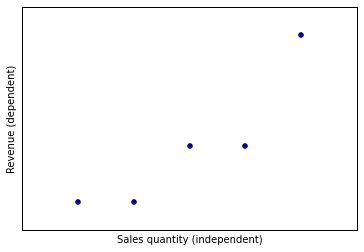

In [75]:
plt.scatter(x, y)
plt.ylabel('Revenue (dependent)')
plt.xlabel('Sales quantity (independent)')
plt.xticks(())
plt.yticks(())
plt.show()

In [76]:
sxx = np.sum((x - x.mean())**2)              # sum of x's
syy = np.sum((y - y.mean())**2)              # sum of y's
sxy = np.sum((x - x.mean()) * (y -y.mean())) # sum of xy's

B = sxy / sxx 
A = y.mean() - B * x.mean()

print 'y = {} + {}x'.format(A, B)

y = -10.0 + 7.0x


R2 score is a metric that determines how well the model fits the observations.

It ranges from 0 to 1. Being 1 a perfect fit.

In [77]:
print 'R2 score: {}'.format(B*sxy/syy)

R2 score: 0.816666666667


1. For each increment in $(x=1)$ revenue $y$ increases in $7$ 
2. Revenue $y$ is $-10$ for an empty production (operational cost).

## Sklearn

Scikit-learn has all methods

In [78]:
from sklearn import linear_model

# create and fit a regression model (sklearn needs arrays to be reshaped)
regr = linear_model.LinearRegression()
regr.fit(x.reshape(5,1), y.reshape(5,1))

print 'B: {}'.format(regr.coef_[0][0])
print 'A: {}'.format(regr.predict(np.array([0]))[0][0])

B: 7.0
A: -10.0


In [79]:
from sklearn.metrics import r2_score
print r2_score(y, regr.predict(x.reshape(5, 1)))

0.816666666667


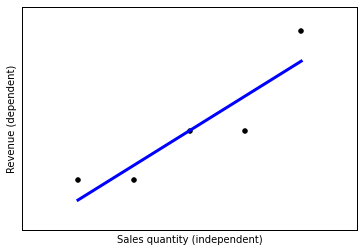

In [80]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x.reshape(5, 1)), color='blue', linewidth=3)
plt.ylabel('Revenue (dependent)')
plt.xlabel('Sales quantity (independent)')
plt.xticks(())
plt.yticks(())
plt.show()

In [89]:
!wget "http://scg.sdsu.edu/wp-content/uploads/2013/09/brain_body.txt"

--2015-12-08 11:31:07--  http://scg.sdsu.edu/wp-content/uploads/2013/09/brain_body.txt
Resolving scg.sdsu.edu... 130.191.140.45
Connecting to scg.sdsu.edu|130.191.140.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1781 (1.7K) [text/plain]
Saving to: 'brain_body.txt'

brain_body.txt      100%[=====================>]   1.74K  --.-KB/s   in 0s     

2015-12-08 11:31:08 (106 MB/s) - 'brain_body.txt' saved [1781/1781]



In [119]:
raw = []
with open('brain_body.txt', 'r') as handle:
    raw = [line.strip() for line in handle]

target = []
data = []

for n, raw_data in enumerate(raw[13:70]):
    print n, raw_data
    _, yy, xx = raw_data.split()
    target.append(eval(yy))
    data.append(eval(xx))


0 1     3.385    44.500
1 2     0.480    15.500
2 3     1.350     8.100
3 4   465.000   423.000
4 5    36.330   119.500
5 6    27.660   115.000
6 7    14.830    98.200
7 8     1.040     5.500
8 9     4.190    58.000
9 10     0.425     6.400
10 11     0.101     4.000
11 12     0.920     5.700
12 13     1.000     6.600
13 14     0.005     0.140
14 15     0.060     1.000
15 16     3.500    10.800
16 17     2.000    12.300
17 18     1.700     6.300
18 19  2547.000  4603.000
19 20     0.023     0.300
20 21   187.100   419.000
21 22   521.000   655.000
22 23     0.785     3.500
23 24    10.000   115.000
24 25     3.300    25.600
25 26     0.200     5.000
26 27     1.410    17.500
27 28   529.000   680.000
28 29   207.000   406.000
29 30    85.000   325.000
30 31     0.750    12.300
31 32    62.000  1320.000
32 33  6654.000  5712.000
33 34     3.500     3.900
34 35     6.800   179.000
35 36    35.000    56.000
36 37     4.050    17.000
37 38     0.120     1.000
38 39     0.023     0.400
39 40

In [109]:
target = np.array(target)
data = np.array(data)
print target.shape, data.shape

(57,) (57,)


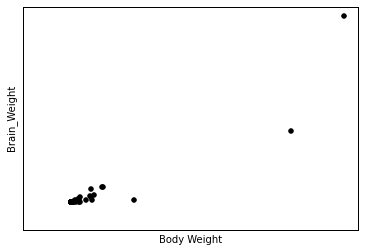

In [110]:
# Plot outputs
plt.scatter(data, target,  color='black')
plt.ylabel('Brain_Weight')
plt.xlabel('Body Weight')
plt.xticks(())
plt.yticks(())
plt.show()

In [111]:
# Plot outputs
plt.scatter(np.log([d for d in data]), np.log(target),  color='black')
plt.ylabel('Brain_Weight')
plt.xlabel('Body Weight')
plt.xticks(())
plt.yticks(())
plt.show()

TypeError: Not implemented for this type

In [118]:
# [np.log(d) for d in data], 
data.dtype

dtype('S8')